Waste Management Using CNN

In [23]:
#requrirements.txt
#numpy
#pandas
#matplotlib
#opencv-python

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [25]:
train_path="C:\\CNN Project\\WasteClassification\\DATASET\\TRAIN"
test_path="C:\\CNN Project\\WasteClassification\\DATASET\\TEST"

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [27]:
#visulaization
x_data = []
y_data = []
for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,"label":y_data})

100%|██████████| 9999/9999 [00:14<00:00, 701.19it/s]


In [28]:
data.shape

(22564, 2)

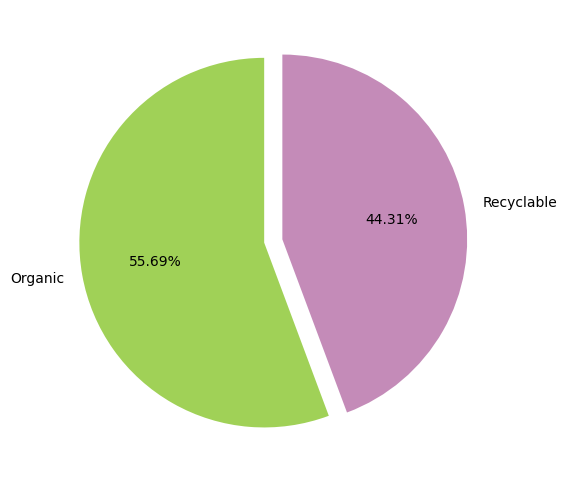

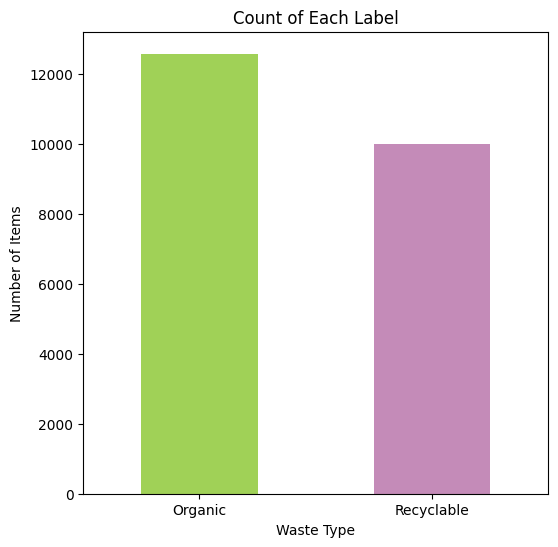

In [29]:
colors = ["#a0d157", "#c48bb8"]
plt.figure(figsize=(10, 6))
plt.pie(data.label.value_counts(), labels=["Organic", "Recyclable"], autopct='%0.2f%%', colors=colors, startangle=90, explode=[0.05, 0.05])  # explode is optional
plt.show()

# Adding a bar plot to visualize the count of each label
label_counts = data['label'].value_counts()
plt.figure(figsize=(6, 6))
label_counts.plot(kind='bar', color=colors)
plt.title('Count of Each Label')
plt.xlabel('Waste Type')
plt.ylabel('Number of Items')
plt.xticks(ticks=[0, 1], labels=["Organic", "Recyclable"], rotation=0)
plt.show()